<a href="https://colab.research.google.com/github/OmriMan/Bagging/blob/main/Assignment2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier

Packages

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

from sklearn.tree import DecisionTreeClassifier  # model

from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # visualize tree

Dataset

In [2]:
def preprocess(df):
    # Putting on index to each dataset before split it
    df = df.set_index("PassengerId")
    # Sex
    change = {'female':1,'male':0}
    df.Sex = df.Sex.map(change)

    # Embarked
    change = {'S':0,'C':1,'Q':2}
    df.Embarked = df.Embarked.map(change)
    df['Embarked'] = df['Embarked'].replace(to_replace = np.nan, value =1)

    # df['Age'] = df['Age'].groupby(df['Age'].isnull()).mean()
    df['Age'] = df['Age'].replace(to_replace = np.nan, value =df['Age'].mean())
    # df['Age'] = df['Age'].replace(to_replace = np.nan, value =50)
    df['Fare'] = df['Fare'].replace(to_replace = np.nan, value =df['Fare'].mean())
    df = df.drop(columns=['Name','Ticket','Cabin'])
    return df

In [20]:
df = pd.read_csv('/content/sample_data/train.csv')
df
# df = preprocess(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [5]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0.0
2,1,1,1,38.000000,1,0,71.2833,1.0
3,1,3,1,26.000000,0,0,7.9250,0.0
4,1,1,1,35.000000,1,0,53.1000,0.0
5,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,0,13.0000,0.0
888,1,1,1,19.000000,0,0,30.0000,0.0
889,0,3,1,29.699118,1,2,23.4500,0.0


In [6]:
# defining our tree object with the hyper parameters discussed above
model = DecisionTreeClassifier(
    splitter='best',
    min_samples_split=3,
    max_depth= 5,
)


model.fit(
    X=df.drop(columns=['Survived']), 
    y=df['Survived']
)

DecisionTreeClassifier(max_depth=5, min_samples_split=3)

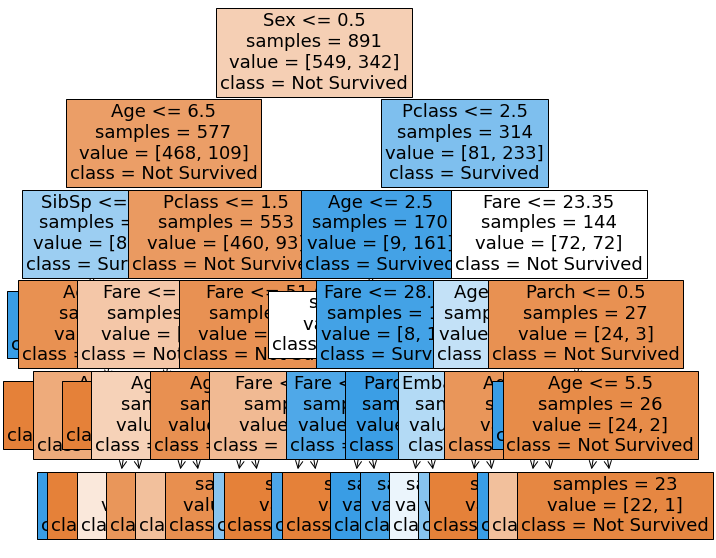

In [21]:
plt.figure(figsize=(10, 10))
plot_tree(
    model,
    feature_names=['Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked'],  
    class_names=['Not Survived', 'Survived'],
    impurity=False,
    filled=True,
    fontsize=18
)
plt.show()

In [8]:
# 892
#893
inputs = pd.DataFrame([{'Pclass':3,	'Sex':0,	'Age':34.5,	'SibSp':0,	'Parch':0,	'Fare':7.8292,'Embarked':2},{'Pclass':3,	'Sex':1,	'Age':47,	'SibSp':1,	'Parch':0,	'Fare':7,'Embarked':0}])
prediction = model.predict(
    inputs
)
print(f"892, Survived: {bool(prediction[0])}")
print(f"893, Survived: {bool(prediction[1])}")

892, Survived: False
893, Survived: False


In [9]:
df_test = pd.read_csv('/content/sample_data/test.csv')
df_test = preprocess(df_test)

In [10]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
inputs = pd.DataFrame(df_test)
prediction = model.predict(
    inputs
)

i=892
for pred in prediction:
  print(f"{i} : Survived: {bool(pred)}")
  i+=1

892 : Survived: False
893 : Survived: False
894 : Survived: False
895 : Survived: False
896 : Survived: True
897 : Survived: False
898 : Survived: True
899 : Survived: False
900 : Survived: True
901 : Survived: False
902 : Survived: False
903 : Survived: False
904 : Survived: True
905 : Survived: False
906 : Survived: True
907 : Survived: True
908 : Survived: False
909 : Survived: False
910 : Survived: True
911 : Survived: False
912 : Survived: False
913 : Survived: False
914 : Survived: True
915 : Survived: False
916 : Survived: True
917 : Survived: False
918 : Survived: True
919 : Survived: False
920 : Survived: False
921 : Survived: False
922 : Survived: False
923 : Survived: False
924 : Survived: True
925 : Survived: False
926 : Survived: False
927 : Survived: False
928 : Survived: True
929 : Survived: True
930 : Survived: False
931 : Survived: True
932 : Survived: False
933 : Survived: False
934 : Survived: False
935 : Survived: True
936 : Survived: True
937 : Survived: False
938 

https://www.kaggle.com/code/zlatankr/titanic-random-forest-82-78

In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
# rf.fit(df.iloc[:, 1:], df.iloc[:, 0])
model_rf.fit(
    X=df.drop(columns=['Survived']), 
    y=df['Survived']
)
print("%.4f" % model_rf.oob_score_)

0.8305


In [13]:
# 892
#893
inputs = pd.DataFrame([{'Pclass':3,	'Sex':0,	'Age':34.5,	'SibSp':0,	'Parch':0,	'Fare':7.8292,'Embarked':2},{'Pclass':3,	'Sex':1,	'Age':47,	'SibSp':1,	'Parch':0,	'Fare':7,'Embarked':0}])
prediction = model_rf.predict(
    inputs
)
print(f"892, Survived: {bool(prediction[0])}")
print(f"893, Survived: {bool(prediction[1])}")

892, Survived: False
893, Survived: False


In [14]:
inputs = pd.DataFrame(df_test)
prediction = model_rf.predict(
    inputs
)

i=892
for pred in prediction:
  print(f"{i} : Survived: {bool(pred)}")
  i+=1

892 : Survived: False
893 : Survived: False
894 : Survived: False
895 : Survived: False
896 : Survived: False
897 : Survived: False
898 : Survived: False
899 : Survived: False
900 : Survived: True
901 : Survived: False
902 : Survived: False
903 : Survived: False
904 : Survived: True
905 : Survived: False
906 : Survived: True
907 : Survived: True
908 : Survived: False
909 : Survived: False
910 : Survived: False
911 : Survived: False
912 : Survived: False
913 : Survived: True
914 : Survived: True
915 : Survived: False
916 : Survived: True
917 : Survived: False
918 : Survived: True
919 : Survived: False
920 : Survived: True
921 : Survived: False
922 : Survived: False
923 : Survived: False
924 : Survived: False
925 : Survived: False
926 : Survived: True
927 : Survived: False
928 : Survived: False
929 : Survived: False
930 : Survived: False
931 : Survived: True
932 : Survived: False
933 : Survived: True
934 : Survived: False
935 : Survived: True
936 : Survived: True
937 : Survived: False
93

Extremely Randomized Trees

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTreesClassifier = ExtraTreesClassifier()
# rf.fit(df.iloc[:, 1:], df.iloc[:, 0])
model_ExtraTreesClassifier.fit(
    X=df.drop(columns=['Survived']), 
    y=df['Survived']
)

ExtraTreesClassifier()

In [16]:
# 892
#893
inputs = pd.DataFrame([{'Pclass':3,	'Sex':0,	'Age':34.5,	'SibSp':0,	'Parch':0,	'Fare':7.8292,'Embarked':2},{'Pclass':3,	'Sex':1,	'Age':47,	'SibSp':1,	'Parch':0,	'Fare':7,'Embarked':0}])
prediction = model_ExtraTreesClassifier.predict(
    inputs
)
print(f"892, Survived: {bool(prediction[0])}")
print(f"893, Survived: {bool(prediction[1])}")
print(f"893, Survived: {prediction}")

892, Survived: False
893, Survived: False
893, Survived: [0 0]


In [17]:
inputs = pd.DataFrame(df_test)
prediction = model_ExtraTreesClassifier.predict(
    inputs
)

i=892
for pred in prediction:
  print(f"{i} : Survived: {bool(pred)}")
  i+=1

892 : Survived: False
893 : Survived: False
894 : Survived: False
895 : Survived: True
896 : Survived: False
897 : Survived: False
898 : Survived: False
899 : Survived: False
900 : Survived: True
901 : Survived: False
902 : Survived: False
903 : Survived: False
904 : Survived: True
905 : Survived: False
906 : Survived: True
907 : Survived: True
908 : Survived: False
909 : Survived: True
910 : Survived: False
911 : Survived: True
912 : Survived: True
913 : Survived: True
914 : Survived: True
915 : Survived: True
916 : Survived: True
917 : Survived: False
918 : Survived: True
919 : Survived: True
920 : Survived: True
921 : Survived: False
922 : Survived: False
923 : Survived: False
924 : Survived: False
925 : Survived: False
926 : Survived: True
927 : Survived: True
928 : Survived: False
929 : Survived: False
930 : Survived: False
931 : Survived: True
932 : Survived: False
933 : Survived: True
934 : Survived: False
935 : Survived: True
936 : Survived: True
937 : Survived: False
938 : Sur